In [1]:
%matplotlib inline

In [2]:
import numpy as np
import os
import time

home = os.path.expanduser('~')

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
def plot_seg(seg, border=False):
    unique, unique_inverse = np.unique(seg, return_inverse=True)
    N = len(unique)
    cmap = np.random.rand(N,3)
    if border:
        cmap[0,:] = 0
    cmap = matplotlib.colors.ListedColormap(cmap)
    plt.imshow(np.arange(N)[unique_inverse].reshape(seg.shape), cmap=cmap)

# CREMI (mip2)

In [5]:
import evaluator

In [6]:
from types import SimpleNamespace

In [7]:
import h5py

In [17]:
d = dict()

d['gs_input'] = 'gs://neuroglancer/kisuk/CREMI/dodam/C_plus/img'
d['dtype']   = 'uint8'
d['in_mip']   = 2
d['begin']   = None
d['end']     = None
d['center']  = (2400,1600,158)
d['size']    = (1024,1024,20)
d['cache']   = True
d['parallel'] = 8

opt = SimpleNamespace(**d)

In [18]:
%%capture
img = evaluator.cutout(opt, dtype=opt.dtype)

In [19]:
print(img.shape)

(20, 256, 256)


In [21]:
img = np.asarray(img)

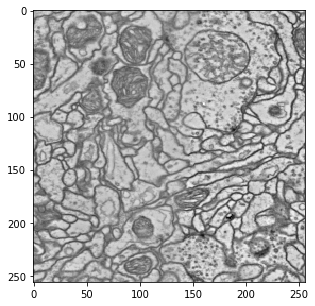

In [22]:
z = 10
plt.figure(figsize=(5,5))
plt.imshow(img[z,:,:], cmap='gray')
plt.show()

In [21]:
fpath = os.path.join(home, '/seungmount/research/kisuklee/Sharing/FlyEM/sample_patch', 'CREMI-dodam-Cplus-mip2-')

with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=img.astype(np.uint8))